In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress

%matplotlib inline

##  Import data

In [50]:
cols = 'Year-CSIRO Adjusted Sea Level-Lower Error Bound-Upper Error Bound-NOAA Adjusted Sea Level'.split('-')
cols = ['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level']

In [51]:
sea = pd.read_csv('epa-sea-level.csv')
sea

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [52]:
sea.rename({'Year': 'year', 
            'CSIRO Adjusted Sea Level': 'CSIRO', 
            'Lower Error Bound': 'lower', 
            'Upper Error Bound': 'upper', 
            'NOAA Adjusted Sea Level': 'NOAA'}, 
          axis='columns', 
          inplace=True)

In [53]:
sea

,year,CSIRO,lower,upper,NOAA
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [54]:
rec1 = sea.iloc[1, :]
rec1

year     1881.000000
CSIRO       0.220472
lower      -0.732283
upper       1.173228
NOAA             NaN
Name: 1, dtype: float64

In [55]:
abs(abs(rec1.lower) - abs(rec1.upper))

0.44094488100000007

In [56]:
abs(abs(rec1.lower) - abs(rec1.upper)) / 2

0.22047244050000003

In [20]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    134 non-null    int64  
 1   CSIRO   134 non-null    float64
 2   lower   134 non-null    float64
 3   upper   134 non-null    float64
 4   NOAA    21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [21]:
sea.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013])

In [22]:
sea.year.is_unique

True

In [25]:
sea[~sea.NOAA.isna()]

,year,CSIRO,lower,upper,NOAA
113,1993,6.291339,6.027559,6.555118,6.297493
114,1994,6.500000,6.236220,6.763780,6.310934
115,1995,6.618110,6.354331,6.881890,6.452569
116,1996,6.787402,6.523622,7.051181,6.627631
117,1997,7.066929,6.803150,7.330709,6.733920
118,1998,6.665354,6.393701,6.937008,6.865806
119,1999,7.011811,6.736220,7.287402,6.848690
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698


In [ ]:
sea.

## Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.


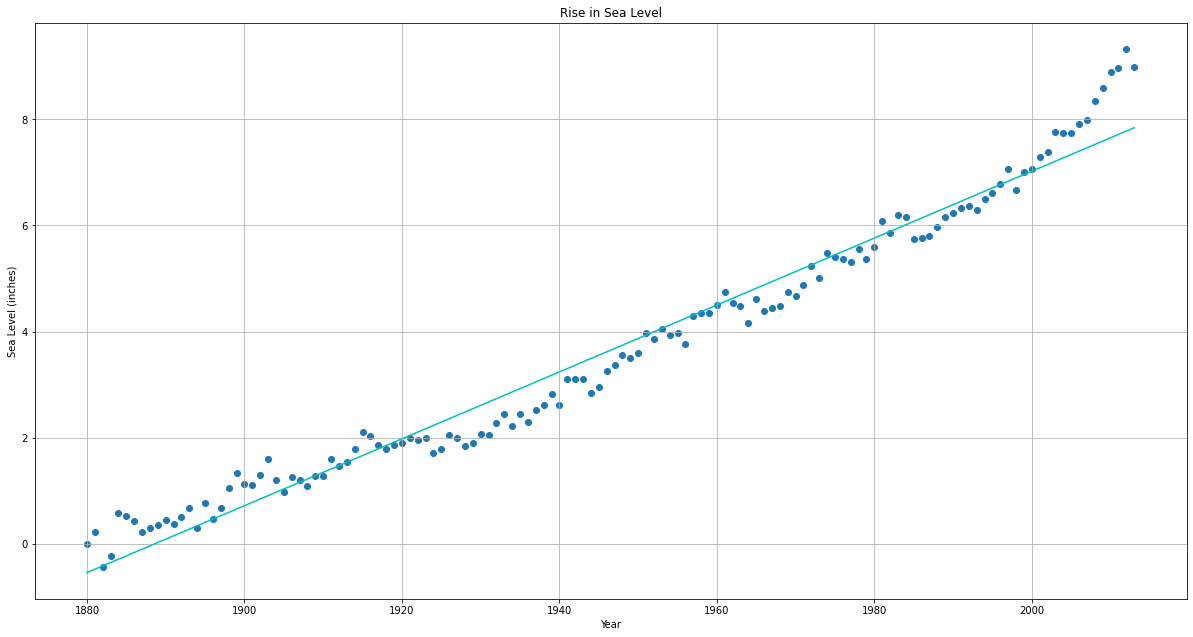

In [107]:
fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Rise in Sea Level')
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')



plt.grid()
plt.scatter('year', 'CSIRO', data=sea)

lin = linregress(sea.year, sea.CSIRO)
plt.plot(sea.year, (lin.intercept + lin.slope * sea.year), 'c')
axes.xaxis.lablepad = 10

In [105]:
axes.xaxis?

In [106]:
axes.xaxis.label

Text(0.5, 17.200000000000003, 'Year')

In [96]:
sea.year

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: year, Length: 134, dtype: int64

In [98]:
lin.intercept + lin.slope * sea.year

0     -0.542124
1     -0.479079
2     -0.416035
3     -0.352990
4     -0.289946
         ...   
129    7.590627
130    7.653672
131    7.716716
132    7.779761
133    7.842806
Name: year, Length: 134, dtype: float64

In [89]:
lin = linregress(sea.year, sea.CSIRO)
lin

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.9847571311825853, pvalue=3.788696979107662e-102, stderr=0.000969211871328706, intercept_stderr=1.886943381242505)

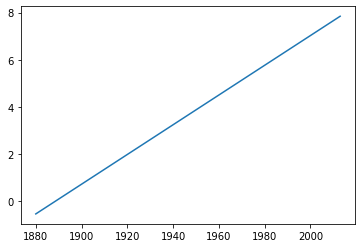

In [93]:
plt.plot(sea.year, (lin.intercept + lin.slope * sea.year))

##  Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [62]:
linregress?

x is: [0.24580423 0.59642861 0.35879163 0.37891011 0.02445137 0.23830957
 0.38793433 0.68054104 0.83934083 0.76073689]
y is: [0.61502838 1.01772738 1.35351035 1.32799754 0.23326104 0.89275698
 0.689498   1.48300835 2.324673   1.52208752]
LinregressResult(slope=1.9448642607472157, intercept=0.26857823524544844, rvalue=0.8576118231957234, pvalue=0.00150893132301119, stderr=0.4123518909028, intercept_stderr=0.21197787984168337)
R-squared: 0.735498


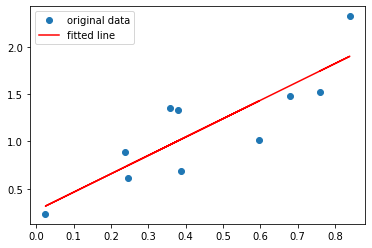

In [71]:
# generate data
from scipy import stats

np.random.seed(12345678)

x = np.random.random(10)
print('x is:', x)

y = 1.6*x + np.random.random(10)
print('y is:', y)

# Perform the linear regression:
res = stats.linregress(x, y)
print(res)

print(f"R-squared: {res.rvalue**2:.6f}")
# R-squared: 0.735498

# Plot the data along with the fitted line:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


In [72]:
res.intercept

0.26857823524544844

In [73]:
res.slope

1.9448642607472157

In [90]:
res?